In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 16.8 MB/s 
     |████████████████████████████████| 263 kB 25.6 MB/s 
     |████████████████████████████████| 981 kB 26.2 MB/s 
     |████████████████████████████████| 468 kB 30.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.3-py3-none-any.whl size=25276310 sha256=c46c136b814cdc813f11da937671609f8a14386032681c563a61e88832f77193
  Stored in directory: /root/.cache/pip/wheels/ee/a4/a5/e874d2603b0830002815f0e36c7355695a69595e5bcaa9dc48
  Created wheel for keras-bert: filename=keras_bert-0.86.0-py3-none-any.whl size=34147 sha256=79fdf0d60ccf83ce5e6066a370f46a222ed49ed6449e133a664ca62bf1b3a4ad
  Stored in directory: /root/.cache/pip/wheels/fc/c1/0a/eb9187261b3f192ac314aefb54fe66f50540c3edb906599633
  Created wheel for keras-transformer: filename=keras_transformer-0.38.0-py3-none-any.whl size=12941 sha256=20853116bedf4047113bf895c77321cf398ce0df8b4ff4c0df3aa8961cdd24b9
  Stored in directory: /root/.cache/pip/wheels/b3/67/58/bcfb43b6ab7

In [2]:
import pandas as pd
train_df = pd.read_csv("../input/nlp-getting-started/train.csv")

In [3]:
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_val, y_train, y_val = train_test_split(train_df['text'], train_df['target'], shuffle=True, test_size = 0.2, random_state=1234, stratify=train_df['target'])

In [5]:
train_labels=train_df['target']

In [6]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)
x_val=np.array(x_val)
y_val=np.array(y_val)

In [7]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          class_names=train_labels.unique().tolist(),
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen=300, 
                                                                                          max_features=45000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [8]:

model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=16)

Is Multi-Label? False
maxlen is 300
done.


In [9]:
learner.lr_find(max_epochs=3) 

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
381/381 [==============================] - 377s 989ms/step - loss: 0.6071 - accuracy: 0.6478
Epoch 2/3
381/381 [==============================] - 378s 993ms/step - loss: 0.7287 - accuracy: 0.6007
Epoch 3/3
381/381 [==============================] - 377s 990ms/step - loss: 3.7146 - accuracy: 0.5003


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


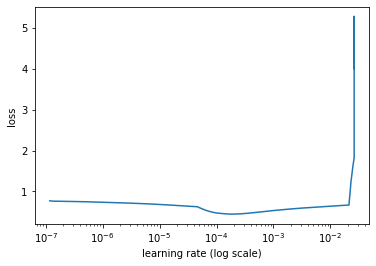

In [10]:
learner.lr_plot()

In [11]:
learner.autofit(1e-4)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024
381/381 [==============================] - 413s 1s/step - loss: 0.4652 - accuracy: 0.7892 - val_loss: 0.3911 - val_accuracy: 0.8398
Epoch 2/1024
381/381 [==============================] - 408s 1s/step - loss: 0.3283 - accuracy: 0.8700 - val_loss: 0.4080 - val_accuracy: 0.8280
Epoch 3/1024
381/381 [==============================] - ETA: 0s - loss: 0.2415 - accuracy: 0.9097
Epoch 00003: Reducing Max LR on Plateau: new max lr will be 5e-05 (if not early_stopping).
381/381 [==============================] - 409s 1s/step - loss: 0.2415 - accuracy: 0.9097 - val_loss: 0.4450 - val_accuracy: 0.8267
Epoch 4/1024
381/381 [==============================] - 409s 1s/step - loss: 0.1393 - accuracy: 0.9524 - val_loss: 0.4911 - val_accuracy: 0.8293
Epoch 5/1024
381/381 [==============================] - ETA

In [12]:
learner.validate(val_data=(x_val_bert, y_val_bert), class_names=['No Disaster', 'Disaster'])

              precision    recall  f1-score   support

 No Disaster       0.80      0.95      0.87       869
    Disaster       0.91      0.69      0.79       654

    accuracy                           0.84      1523
   macro avg       0.86      0.82      0.83      1523
weighted avg       0.85      0.84      0.84      1523



array([[825,  44],
       [200, 454]])

In [13]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [14]:
learner.print_layers()

0 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff3a334d190>
1 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff3a334d510>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x7ff3a334d8d0>
3 (trainable=True) : <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7ff3d06402d0>
4 (trainable=True) : <tensorflow.python.keras.layers.merge.Add object at 0x7ff3a3342550>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x7ff3a334df90>
6 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7ff3a5becf10>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7ff3a3340910>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x7ff3a3340cd0>
9 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7ff3a3340f90>
10 (trainable=True) : <t

In [15]:
test_df = pd.read_csv("../input/nlp-getting-started/test.csv")
test_df["target"] = predictor.predict(test_df["text"].tolist())

test_df = test_df[["id", "target"]]

In [16]:
test_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [17]:
test_df.to_csv("submisssions.csv", index=False)

In [18]:
./

SyntaxError: invalid syntax (<ipython-input-18-f87512eb5e8b>, line 1)